#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data (DONE)
2. Visualize some information of data (DONE)
3. Normalize Data to train linear regression model (DONE)
4. Train linear regression model and show the model's intercepts, coeficients (DONE)
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html) (DONE)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high? (DONE)


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time

Mounted at /content/drive


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/final_house_loan.csv" # Path to your file
df = read_dataset(path)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [ ]:
# change header
df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Property Age',
       'Property Location', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [ ]:
columns = ["Gender", "Age","Income","Income Stability","Property Age","Property Location","Property Price","Loan Sanction Amount"]

In [ ]:
df.columns = columns

In [ ]:
df.head()

,Gender,Age,Income,Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


<Axes: >

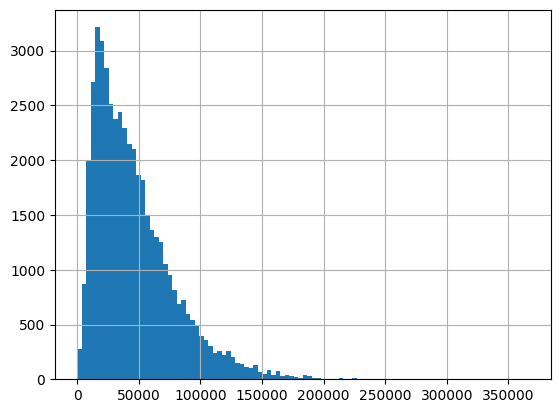

In [ ]:
#ToDo: Show histogram of dataframe
df['Loan Sanction Amount'].hist(bins = 100) # right-skewed distribution

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here

In [ ]:
# data shape(row and col)
display(df.shape)

(47297, 8)

In [ ]:
# view data type of each feature in dataset
display(df.dtypes)
# gender, income stability, property location : object

Gender                   object
Age                       int64
Income                  float64
Income Stability         object
Property Age            float64
Property Location        object
Property Price          float64
Loan Sanction Amount    float64
dtype: object

In [ ]:
# null checking
df.isnull().sum()
# Income Stability have 32 values null
# Property Age have 34 values null
# Property Price have 3 values null

Gender                   0
Age                      0
Income                  32
Income Stability        12
Property Age            34
Property Location        3
Property Price           0
Loan Sanction Amount     0
dtype: int64

In [ ]:
df['Income Stability'].unique()

array(['Low', 'High', nan], dtype=object)

## Preprocessing

In [ ]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df.dropna()
    return df

In [ ]:
df = preprocessing_data(df.copy())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47251 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                47251 non-null  object 
 1   Age                   47251 non-null  int64  
 2   Income                47251 non-null  float64
 3   Income Stability      47251 non-null  object 
 4   Property Age          47251 non-null  float64
 5   Property Location     47251 non-null  object 
 6   Property Price        47251 non-null  float64
 7   Loan Sanction Amount  47251 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
# We're dropna that data because they compare to the original data so little

## Feature Engineering

In [ ]:
# check attributes: objects
display(df['Income Stability'].unique())
display(df['Gender'].unique())
display(df['Property Location'].unique())

array(['Low', 'High'], dtype=object)

array(['F', 'M'], dtype=object)

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [ ]:
def normalize_data(df):
    # Todo: normalize data into numerical data
    df = df.copy()
    df['Income Stability'] = df['Income Stability'].astype("category").cat.codes
    df['Gender'] = df['Gender'].astype("category").cat.codes
    df['Property Location'] = df['Property Location'].astype("category").cat.codes
    return df

In [ ]:
df.corr()

,Age,Income,Property Age,Property Price,Loan Sanction Amount
Age,1.000000,-0.044086,-0.044085,-0.003274,-0.000115
Income,-0.044086,1.000000,0.999986,0.358110,0.392897
Property Age,-0.044085,0.999986,1.000000,0.358110,0.392892
Property Price,-0.003274,0.358110,0.358110,1.000000,0.994429
Loan Sanction Amount,-0.000115,0.392897,0.392892,0.994429,1.000000


[Text(0.5, 0, 'Gender'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Income'),
 Text(3.5, 0, 'Income Stability'),
 Text(4.5, 0, 'Property Age'),
 Text(5.5, 0, 'Property Location'),
 Text(6.5, 0, 'Property Price'),
 Text(7.5, 0, 'Loan Sanction Amount')]

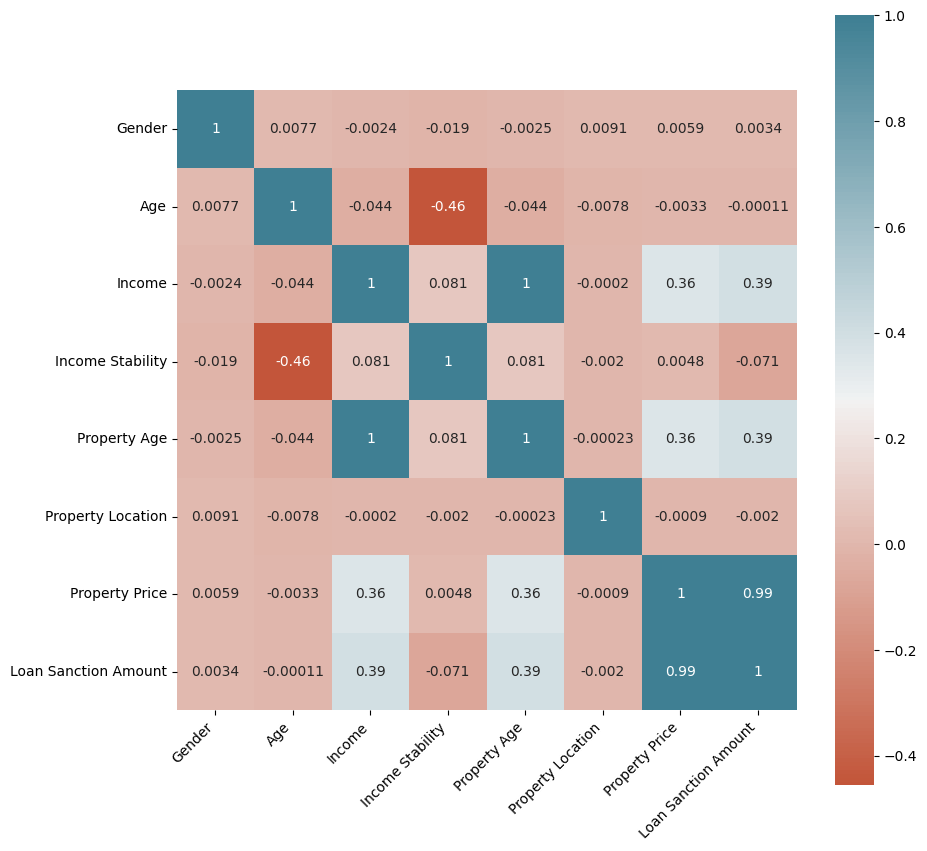

In [ ]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df = normalize_data(df.copy())
# Resize
fix , ax = plt.subplots(figsize = (10,10))
# Show heatmap after normalized data
sns.heatmap(
    df.corr(),
    cmap=sns.diverging_palette(20, 220, n=200), # color
    square=True, # square
    ax = ax,
    annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove("Loan Sanction Amount")
    # Todo: Select features
    X = df[columns]
    # Todo: Select label
    y = df["Loan Sanction Amount"]
    return X, y

X, y = prepare_X_y(df)

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X,y,train_size = train_size, random_state = 2023)# Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
train_size = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=train_size)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def build_linear_model(X, y):
    # Todo: use sklearn model and config your parameters
    model = LinearRegression(fit_intercept=True) # bias
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_linear_model(trainX, trainY)

# Compare on training dataset
pred_train = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
print()
pred_test = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )
print()
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  163.14116153145872

mean absolute error of linear model on test set  137.10457506737418

[-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

11896.351699425148


# Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

In [ ]:
num_folds = 10
seed = 7
scoring = 'neg_mean_absolute_error'

In [ ]:
# train hyperparameter
k_values = np.array([0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2])
param_grid = dict(alpha=k_values)
model = Lasso(fit_intercept=True, max_iter = 5000)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.907e+10, tolerance: 3.160e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.970e+10, tolerance: 3.139e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e+10, tolerance: 3.137e+09

Best: -163.383126 using {'alpha': 1e-06}
-163.383126 (22.930319) with: {'alpha': 1e-06}
-163.383131 (22.930318) with: {'alpha': 1e-05}
-163.383183 (22.930314) with: {'alpha': 0.0001}
-163.383703 (22.930274) with: {'alpha': 0.001}
-163.388911 (22.929875) with: {'alpha': 0.01}
-164.034015 (22.884032) with: {'alpha': 1.0}
-164.836161 (22.835601) with: {'alpha': 2.0}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.298e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# fit model
alpha = 1e-6
def build_lasso_model(X, y):
    # Todo: use sklearn model and config your parameters
    alpha = 1
    model = Lasso(alpha = alpha)
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)
print("mean absolute error of Lasso model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)
print("mean absolute error of Lasso model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of Lasso model on train set  163.82746511830643
mean absolute error of Lasso model on test set  137.76715598357603
[-2.30411413e+02 -7.92539710e+01  8.56088453e-01 -1.11270030e+04
  1.68487165e-01 -5.87931826e+01  3.36340395e-01]

11873.145648014179


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.903e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# train hyperparameter
alpha = np.array([0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100])
param_grid = dict(alpha=k_values)
model = Ridge()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -163.352423 using {'alpha': 1e-06}
-163.352423 (22.930686) with: {'alpha': 1e-06}
-163.352425 (22.930686) with: {'alpha': 1e-05}
-163.352437 (22.930685) with: {'alpha': 0.0001}
-163.352565 (22.930670) with: {'alpha': 0.001}
-163.353841 (22.930526) with: {'alpha': 0.01}
-163.498227 (22.914908) with: {'alpha': 1.0}
-163.653472 (22.898519) with: {'alpha': 2.0}


In [ ]:
# (optional) # train hyperparameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(trainX, trainY)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-163.7393735110424


In [ ]:
alpha = 0.0001


def build_ridge_model(X, y):
    # Todo: use sklearn model and config your parameters
    alpha = 10
    model = Ridge(alpha = alpha)
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)
print("mean absolute error of Ridge model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)
print("mean absolute error of Ridge model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of Ridge model on train set  164.8373604957749
mean absolute error of Ridge model on test set  138.6982480708752
[-2.33780003e+02 -7.89648970e+01  5.63265777e-01 -1.10902355e+04
  4.60831162e-01 -6.01884040e+01  3.36342750e-01]

11832.039313014364


# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# tuning hyperparameter
scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

model = ElasticNet()
kfold = KFold(n_splits=5, random_state=seed, shuffle= True)

alpha = {'alpha': np.logspace(-5, 5, 100, endpoint=True)}
grid = GridSearchCV(estimator=model, param_grid=alpha, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, trainY)

print('MAE: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.584e+10, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+10, tolerance: 2.777e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.003e+10, tolerance: 2.825e+09

MAE: -153.759
Config: {'alpha': 0.00210490414451202}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.977e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# tuning hyperparameter
scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

model = ElasticNet()
kfold = KFold(n_splits=5, random_state=seed, shuffle= True)
l1_ratio = {'l1_ratio': np.arange(0, 1, 0.01)}
grid = GridSearchCV(estimator=model, param_grid=l1_ratio, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, trainY)

print('MAE: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.573e+12, tolerance: 2.809e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.532e+12, tolerance: 2.777e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

MAE: -326.264
Config: {'l1_ratio': 0.99}


In [ ]:
# fit model
alpha = 0.00210490414451202
l1_ratio = 0.99

def build_elastic_model(X, y):# Todo: use sklearn model and config your parameters
    alpha=1
    l1_ratio=0.1
    model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred_train = model.predict(trainX)
print("mean absolute error of ELastic Net model on train set ", mean_absolute_error(y_pred=pred_train, y_true=trainY) )
pred_test = model.predict(testX)
print("mean absolute error of ELastic Net model on test set ", mean_absolute_error(y_pred=pred_test, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of ELastic Net model on train set  1834.9403413727894
mean absolute error of ELastic Net model on test set  1830.0451723668675
[-3.28903791e+01  3.47545821e+00  9.47196012e-01 -7.32989189e+02
 -4.81791024e-02 -1.90134814e+01  3.36962647e-01]

-809.1330874291016


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.645e+11, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

# Degree 2

mean absolute error of linear model (with poly transform) on train set  159.7115198405628
mean absolute error of linear model (with poly transform) on test set  133.85237743200997


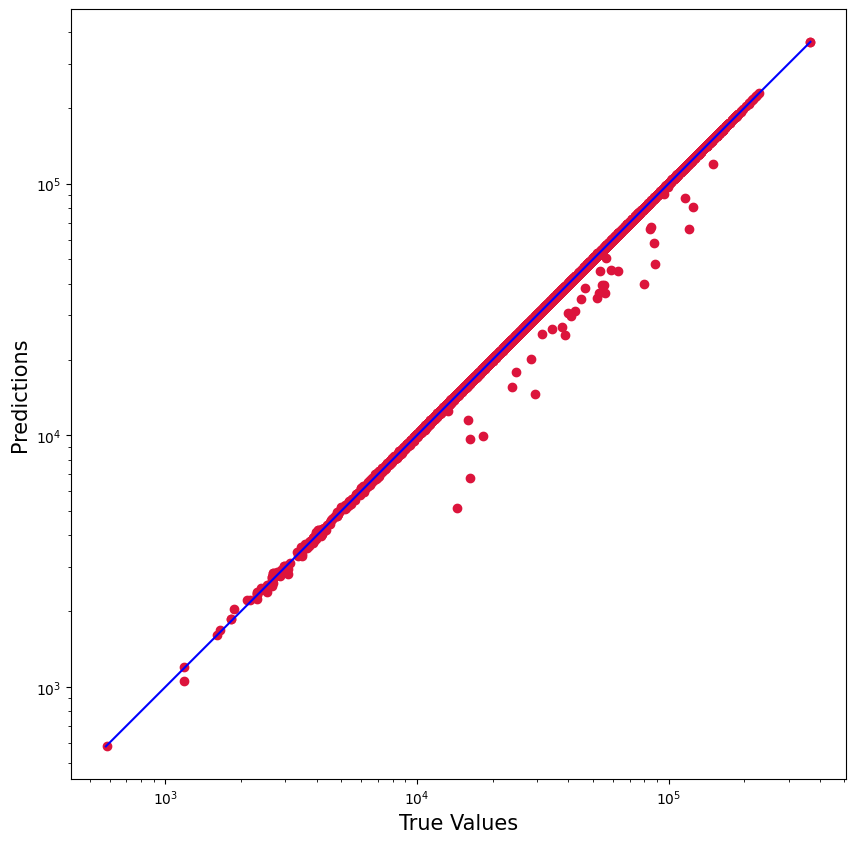

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias = False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model
# Compare on training dataset

poly_model = build_pipeline(trainX, trainY)
poly_pred_train = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY) )

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))

plt.figure(figsize=(10,10))
plt.scatter(testY, poly_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(poly_pred_test), max(testY))
p2 = min(min(poly_pred_test), min(testY))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Degree 3

mean absolute error of linear model (with poly transform) on train set  250.2007222747432
mean absolute error of linear model (with poly transform) on test set  227.56805118367134


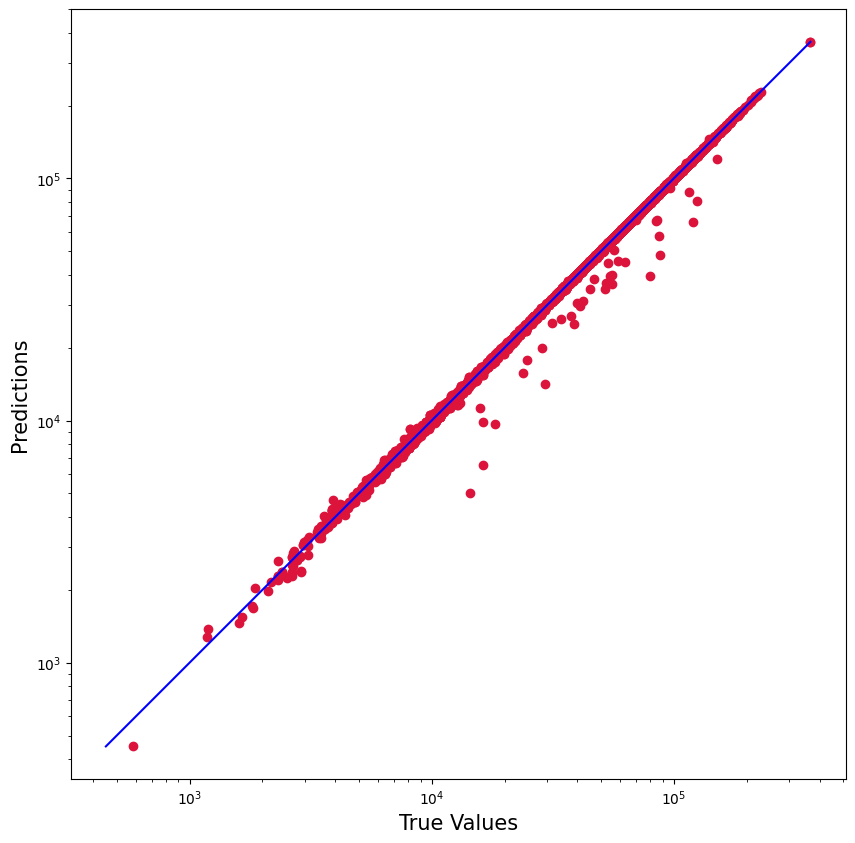

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(3, include_bias = False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX, trainY)
poly_pred_train = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY) )

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))

plt.figure(figsize=(10,10))
plt.scatter(testY, poly_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(poly_pred_test), max(testY))
p2 = min(min(poly_pred_test), min(testY))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Degree 5

mean absolute error of linear model (with poly transform) on train set  5647.52386143416
mean absolute error of linear model (with poly transform) on test set  5710.478016609696


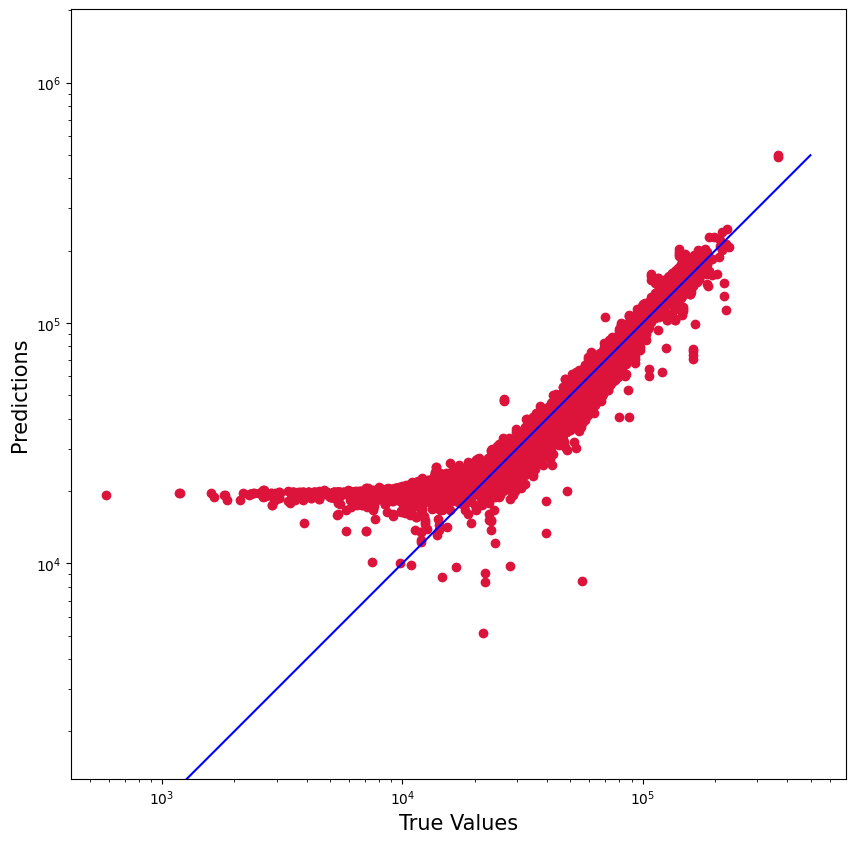

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(5, include_bias = False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX, trainY)
poly_pred_train = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY) )

poly_pred_test = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))

plt.figure(figsize=(10,10))
plt.scatter(testY, poly_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(poly_pred_test), max(testY))
p2 = min(min(poly_pred_test), min(testY))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# The higher of the degree => overfitting